In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Explore death rates from different resp diseases

In [6]:
filename = "C:/Users/LH/DataOpen2021/data_NO_UPLOAD/us_chronic_resp_disease.csv"

In [7]:
disease = pd.read_csv(filename)


## Basic information

In [8]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353700 entries, 0 to 3353699
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   location_name  object 
 1   FIPS           float64
 2   cause_name     object 
 3   sex            object 
 4   year_id        int64  
 5   mx             float64
 6   lower          float64
 7   upper          float64
dtypes: float64(4), int64(1), object(3)
memory usage: 204.7+ MB


In [9]:
disease.isna().any()

location_name    False
FIPS              True
cause_name       False
sex              False
year_id          False
mx               False
lower            False
upper            False
dtype: bool

In [ ]:
# we drop FIPs
disease.drop('FIPS',axis=1,inplace=True)

## Explore how death rates from different types of diseases have changed over time

In [ ]:
# different types of diseases
disease.cause_name.unique()

array(['Chronic respiratory diseases',
       'Chronic obstructive pulmonary disease', 'Pneumoconiosis',
       'Silicosis', 'Asbestosis', 'Coal workers pneumoconiosis',
       'Other pneumoconiosis', 'Asthma',
       'Interstitial lung disease and pulmonary sarcoidosis',
       'Other chronic respiratory diseases'], dtype=object)

There is missing data FIPs, otherwise it's fine

In [ ]:
causes = disease[['cause_name','year_id','mx']].groupby(['cause_name','year_id']).mean()

In [ ]:
all_causes = disease.cause_name.unique()

In [ ]:
all_causes

array(['Chronic respiratory diseases',
       'Chronic obstructive pulmonary disease', 'Pneumoconiosis',
       'Silicosis', 'Asbestosis', 'Coal workers pneumoconiosis',
       'Other pneumoconiosis', 'Asthma',
       'Interstitial lung disease and pulmonary sarcoidosis',
       'Other chronic respiratory diseases'], dtype=object)

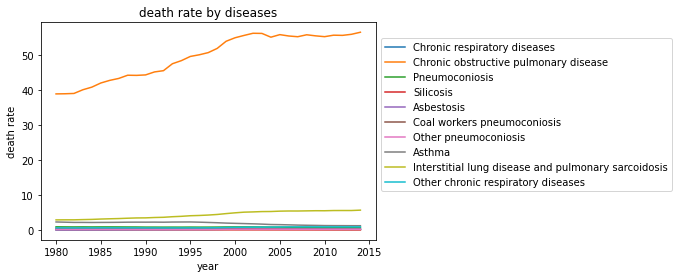

In [ ]:
ax = causes.xs('Asbestosis').plot(title='death rate by diseases',xlabel='year',ylabel='death rate')
for cause_name in all_causes[1:]:
    causes.xs(cause_name).plot(ax=ax,xlabel='year',ylabel='death rate')
ax.legend(all_causes,loc='lower right',bbox_to_anchor=(1.9, 0.2),fancybox=True)

# Sales per day

In [11]:
filename = "sales_per_day.csv"
sales = pd.read_csv(filename)

In [12]:
sales

,Entity,Code,Year,amt
0,Armenia,ARM,1988,12.0
1,Armenia,ARM,1989,11.6
2,Armenia,ARM,1990,11.9
3,Armenia,ARM,1991,9.3
4,Armenia,ARM,1992,4.9
...,...,...,...,...
2762,Yugoslavia,OWID_YGS,1988,8.9
2763,Yugoslavia,OWID_YGS,1989,8.5
2764,Yugoslavia,OWID_YGS,1990,8.5
2765,Yugoslavia,OWID_YGS,1991,7.8


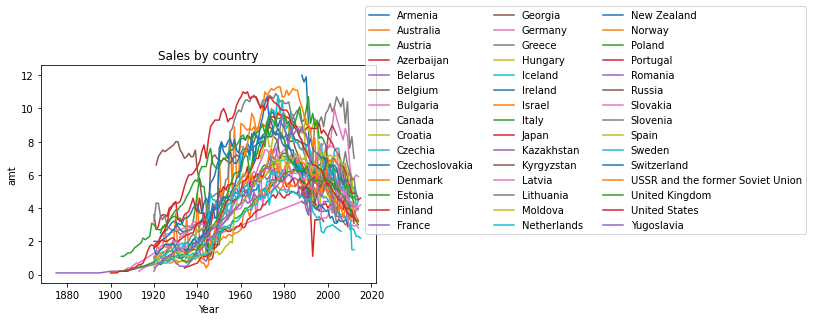

In [13]:
fig,ax = plt.subplots()
countries = sales.Entity.unique()
countries
for country in countries:
    sales.loc[sales.Entity==country].plot(x='Year',y='amt',ax=ax,title="Sales by country",ylabel='amt')
ax.legend(countries,loc='lower right',ncol=3,bbox_to_anchor=(2.3, 0.2),fancybox=True)


## Scraping world bank data for high income countries

In [20]:
import requests
url = "https://data.worldbank.org/country/XD"
req = requests.get(url=url).content
from bs4 import BeautifulSoup
soup = BeautifulSoup(req)
HIC_elts = soup.findAll(class_='label')
HICs = []
for elt in HIC_elts:
    HICs.append(elt.text)

In [43]:
our_HICs = [x for x in countries if x in HICs]
not_HICs = [x for x in countries if x not in HICs]
print("# of all countries: ",len(countries))
print("HICs: ",len(our_HICs))
print("Below are the list of non-HICs: ")
print(not_HICs)

# of all countries:  45
HICs:  30
Below are the list of non-HICs: 
['Armenia', 'Azerbaijan', 'Belarus', 'Bulgaria', 'Czechia', 'Czechoslovakia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Romania', 'Russia', 'Slovakia', 'USSR and the former Soviet Union', 'Yugoslavia']


In [53]:
sales['HIC'] = sales.Entity.apply(lambda x: x in our_HICs)


In [60]:
sales_by_HIC = sales[['Year','HIC','amt']].groupby(['HIC','Year']).mean()
sales_by_HIC

amt
HIC   Year          
False 1913  0.200000
      1920  0.500000
      1921  0.950000
      1922  1.100000
      1923  1.475000
...              ...
True  2011  4.294737
      2012  3.981250
      2013  3.836364
      2014  3.630000
      2015  3.666667

[198 rows x 1 columns]

In [63]:
sales_by_HIC

amt
HIC   Year          
False 1913  0.200000
      1920  0.500000
      1921  0.950000
      1922  1.100000
      1923  1.475000
...              ...
True  2011  4.294737
      2012  3.981250
      2013  3.836364
      2014  3.630000
      2015  3.666667

[198 rows x 1 columns]

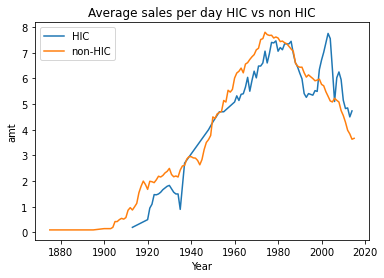

In [87]:
fig,ax = plt.subplots()
title = 'Average-sales-per-day-HIC-vs-non-HIC'
plt.title(title.replace("-"," "))
plt.ylabel("amt")
sales_by_HIC.xs(False).plot(ax=ax,label = 'HIC')
sales_by_HIC.xs(True).plot(ax=ax,label = 'non-HIC')
ax.legend(['HIC','non-HIC'])
plt.savefig(f'plots\{title}.jpg',bbox_inches ='tight')